# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1386]:
# Import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import precision_recall_curve


In [1387]:
# Read the Data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Preparation and EDA

In [1388]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1389]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1390]:
# Check number of unique values in all columns
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1391]:
# Prospect ID and Lead Number  has all unique values hence no value add for predictivity. Dropping them.
leads.index = leads["Lead Number"]
leads = leads.drop(['Prospect ID','Lead Number'],axis=1)
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1392]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1393]:
# Find columns where invalid data 'Select' is found as one of their values
invalid_columns = []
for col in leads.select_dtypes(exclude=np.number).columns:
    if(any(leads[col].str.lower().str.contains('select').dropna())):
        invalid_columns.append(col)

print(select_columns)

['How did you hear about X Education', 'Lead Profile', 'City']


In [1394]:
# Check percentage of values as 'Select, in the above columns
for col in invalid_columns:
    print(round(100*leads[col].value_counts()/len(leads[col]),2))
    print('\n\n')

Select                               21.02
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64



Select                   54.58
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other              

#### 'Select' present in `Specialization` column could be because of customer being not employed. So we will replace select with "No Job" . For other columns containing 'Select', seems like a missing value so we will replace with np.nan.

In [1395]:
# Cleaning Specialization column
leads['Specialization'] = leads['Specialization'].apply(lambda x: 'No Job' if x == 'Select' else x)
round(100*leads['Specialization'].value_counts()/len(leads['Specialization']),2)

No Job                               21.02
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [1396]:
# Cleaning other columns
invalid_columns.remove('Specialization')
invalid_columns

['How did you hear about X Education', 'Lead Profile', 'City']

In [1397]:
# Replacing with np.nan
for col in invalid_columns:
    leads[col] = leads[col].apply(lambda x: np.nan if x=='Select' else x)
    print(round(100*leads[col].value_counts()/len(leads[col]),2))
    print('\n\n')

Online Search            8.74
Word Of Mouth            3.77
Student of SomeSchool    3.35
Other                    2.01
Multiple Sources         1.65
Advertisements           0.76
Social Media             0.73
Email                    0.28
SMS                      0.25
Name: How did you hear about X Education, dtype: float64



Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64



Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64





In [1398]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,No Job,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,No Job,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,No Job,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Missing Values Treatment

In [1399]:
round(100*leads.isnull().sum()/len(leads),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Call                                       0.00
Do Not Ema

In [1400]:
# Get the list of columns having higher percentage of missing columns. We will drop columns having more than 25% missing values
high_miss_cols = list(leads.columns[round(100*leads.isnull().sum()/len(leads),2) > 25].sort_values())
high_miss_cols

['Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Profile Score',
 'City',
 'Country',
 'How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Tags',
 'What is your current occupation',
 'What matters most to you in choosing a course']

In [1401]:
# Drop and check
leads = leads.drop(high_miss_cols,1)
round(100*leads.isnull().sum()/len(leads),2).sort_values(ascending=False)

Specialization                              15.56
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Last Notable Activity                        0.00
Search                                       0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
Total Time Spent on Website                  0.00
Magazine                                     0.00
A free copy of Mastering The Interview       0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00


In [1402]:
leads.Specialization.value_counts()

No Job                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1403]:
# Percentage of Converted leads with Specialization column as null values 
leads['Converted'][leads.Specialization.isnull()].value_counts()/len(leads['Converted'][leads.Specialization.isnull()])*100

0    89.499305
1    10.500695
Name: Converted, dtype: float64

In [1404]:
# Percentage of Converted leads with Specialization column as non null values 
leads['Converted'].value_counts()/len(leads['Converted'])

0    0.61461
1    0.38539
Name: Converted, dtype: float64

#### There is lower conversion of leads when the specialization column is null. We want to retain this info hence impute the null values as 'Missing'

In [1405]:
leads.Specialization[leads.Specialization.isnull()] = 'Missing'
leads.Specialization.value_counts()

No Job                               1942
Missing                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1406]:
# Missing value Imputation of TotalVisits with median value
leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [1407]:
# Using Fillna to impute
leads.TotalVisits = leads.TotalVisits.fillna(leads.TotalVisits.median())
leads.TotalVisits.isnull().value_counts()

False    9240
Name: TotalVisits, dtype: int64

In [1408]:
leads.TotalVisits.isnull().value_counts()

False    9240
Name: TotalVisits, dtype: int64

In [1409]:
# Missing value Imputation of Page Views Per Visit  with median value
leads["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1410]:
leads["Page Views Per Visit"].isnull().value_counts()

False    9103
True      137
Name: Page Views Per Visit, dtype: int64

In [1411]:
# Using Fillna to impute
leads["Page Views Per Visit"] = leads["Page Views Per Visit"].fillna(leads["Page Views Per Visit"].median())
leads["Page Views Per Visit"].isnull().value_counts()

False    9240
Name: Page Views Per Visit, dtype: int64

In [1412]:
# Check number of nulls in Last Activity
leads["Last Activity"].isnull().value_counts()

False    9137
True      103
Name: Last Activity, dtype: int64

In [1413]:
# Check the mode for the column
leads["Last Activity"].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [1414]:
# Imputing Last Activity with Mode
leads["Last Activity"][leads["Last Activity"].isnull()] = leads["Last Activity"].mode()[0]
leads["Last Activity"].isnull().value_counts()

False    9240
Name: Last Activity, dtype: int64

In [1415]:
leads["Last Activity"].mode()[0]

'Email Opened'

In [1416]:
leads['Lead Source'].isnull().value_counts()

False    9204
True       36
Name: Lead Source, dtype: int64

In [1417]:
leads["Last Activity"].isnull().value_counts()

False    9240
Name: Last Activity, dtype: int64

In [1418]:
leads["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [1419]:
leads["Lead Source"].mode()[0]

'Google'

In [1420]:
# Imputing Lead Source with Mode
leads["Lead Source"][leads["Lead Source"].isnull()] = leads["Lead Source"].mode()[0]
leads["Lead Source"].isnull().value_counts()

False    9240
Name: Lead Source, dtype: int64

In [1421]:
# Check missing values post treatment
round(100*leads.isnull().sum()/len(leads),2).sort_values(ascending=False)

Last Notable Activity                       0.0
Search                                      0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

### Information Value of Predictors

In [1422]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [1423]:
final_leads, IV = data_vars(leads,leads.Converted)
IV

,VAR_NAME,IV
0,A free copy of Mastering The Interview,6.752446e-03
1,Digital Advertisement,1.564146e-04
2,Do Not Call,3.155281e-07
3,Do Not Email,9.544292e-02
4,Get updates on DM Content,0.000000e+00
5,I agree to pay the amount through cheque,0.000000e+00
6,Last Activity,7.742267e-01
7,Last Notable Activity,6.407854e-01
8,Lead Origin,5.740567e-01
9,Lead Source,6.527211e-01


In [1424]:
# Considering variables having predictive value greater than 0.01
IV.sort_values('IV')[IV.IV > 0.01]

,VAR_NAME,IV
19,TotalVisits,0.014968
3,Do Not Email,0.095443
18,Total Time Spent on Website,0.249762
16,Specialization,0.370421
8,Lead Origin,0.574057
7,Last Notable Activity,0.640785
9,Lead Source,0.652721
6,Last Activity,0.774227


In [1425]:
high_pred_cols = list(IV.sort_values('IV')[IV.IV > 0.01]['VAR_NAME'])
high_pred_cols

['TotalVisits',
 'Do Not Email',
 'Total Time Spent on Website',
 'Specialization',
 'Lead Origin',
 'Last Notable Activity',
 'Lead Source',
 'Last Activity']

In [1426]:
final_leads = leads[high_pred_cols]
final_leads['Converted'] = leads['Converted']
final_leads.head()

,TotalVisits,Do Not Email,Total Time Spent on Website,Specialization,Lead Origin,Last Notable Activity,Lead Source,Last Activity,Converted
Lead Number,,,,,,,,,
660737,0.0,No,0,No Job,API,Modified,Olark Chat,Page Visited on Website,0
660728,5.0,No,674,No Job,API,Email Opened,Organic Search,Email Opened,0
660727,2.0,No,1532,Business Administration,Landing Page Submission,Email Opened,Direct Traffic,Email Opened,1
660719,1.0,No,305,Media and Advertising,Landing Page Submission,Modified,Direct Traffic,Unreachable,0
660681,2.0,No,1428,No Job,Landing Page Submission,Modified,Google,Converted to Lead,1


In [1427]:
#Check number of unique values for all variables
final_leads.nunique()

TotalVisits                      41
Do Not Email                      2
Total Time Spent on Website    1731
Specialization                   20
Lead Origin                       5
Last Notable Activity            16
Lead Source                      21
Last Activity                    17
Converted                         2
dtype: int64

In [1428]:
final_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 9 columns):
TotalVisits                    9240 non-null float64
Do Not Email                   9240 non-null object
Total Time Spent on Website    9240 non-null int64
Specialization                 9240 non-null object
Lead Origin                    9240 non-null object
Last Notable Activity          9240 non-null object
Lead Source                    9240 non-null object
Last Activity                  9240 non-null object
Converted                      9240 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 721.9+ KB


#### Categorical Variables preparation for modelling

In [1429]:
#List of categorical columns
final_cat_cols = final_leads.select_dtypes(exclude=np.number).columns.tolist()
final_cat_cols

['Do Not Email',
 'Specialization',
 'Lead Origin',
 'Last Notable Activity',
 'Lead Source',
 'Last Activity']

In [1430]:
# Check distribution of unique values for all categorical columns
for col in final_cat_cols:
    print(round(100*final_leads[col].value_counts()/len(final_leads[col]),2))
    print('\n\n')    

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64



No Job                               21.02
Missing                              15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64



Landing Page Submission    52.88
API

In [1431]:
# Reduce number of categories in categorical variables. Consolidate all values having presence of less than 2 percent
for col in final_cat_cols:
    temp_df = pd.DataFrame(100*final_leads[col].value_counts()/len(final_leads[col]))
    temp_df = temp_df.reset_index()
    temp_df.columns = ['Category','percentage']
    to_remove = list(temp_df[temp_df.percentage < 2]['Category'])
    final_leads[col] = final_leads[col].apply(lambda x: 'Others' if x in to_remove else x)

In [1432]:
# Check distribution of unique values for all categorical columns after consolidation
for col in final_cat_cols:
    print(round(100*final_leads[col].value_counts()/len(final_leads[col]),2))
    print('\n\n')

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64



No Job                               21.02
Missing                              15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Others                                9.02
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
Name: Specialization, dtype: float64



Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Others                      0.61
Name: Lead Origin, dtype: float64



Modified                   36.87
Email Opened               30.60
SMS Sent                   23.51
Others                      5.58
Page Visited on Website     3.44
Nam

In [1433]:
final_leads.nunique()

TotalVisits                      41
Do Not Email                      2
Total Time Spent on Website    1731
Specialization                   13
Lead Origin                       4
Last Notable Activity             5
Lead Source                       6
Last Activity                     8
Converted                         2
dtype: int64

In [1434]:
final_leads.head()

,TotalVisits,Do Not Email,Total Time Spent on Website,Specialization,Lead Origin,Last Notable Activity,Lead Source,Last Activity,Converted
Lead Number,,,,,,,,,
660737,0.0,No,0,No Job,API,Modified,Olark Chat,Page Visited on Website,0
660728,5.0,No,674,No Job,API,Email Opened,Organic Search,Email Opened,0
660727,2.0,No,1532,Business Administration,Landing Page Submission,Email Opened,Direct Traffic,Email Opened,1
660719,1.0,No,305,Media and Advertising,Landing Page Submission,Modified,Direct Traffic,Others,0
660681,2.0,No,1428,No Job,Landing Page Submission,Modified,Google,Converted to Lead,1


In [1435]:
final_leads.columns

Index(['TotalVisits', 'Do Not Email', 'Total Time Spent on Website',
       'Specialization', 'Lead Origin', 'Last Notable Activity', 'Lead Source',
       'Last Activity', 'Converted'],
      dtype='object')

In [1436]:
final_leads.dtypes

TotalVisits                    float64
Do Not Email                    object
Total Time Spent on Website      int64
Specialization                  object
Lead Origin                     object
Last Notable Activity           object
Lead Source                     object
Last Activity                   object
Converted                        int64
dtype: object

In [1437]:
# Converting the target variable to Category type
final_leads.Converted = final_leads.Converted.astype('category')
final_leads.dtypes

TotalVisits                     float64
Do Not Email                     object
Total Time Spent on Website       int64
Specialization                   object
Lead Origin                      object
Last Notable Activity            object
Lead Source                      object
Last Activity                    object
Converted                      category
dtype: object

# Data Visualization

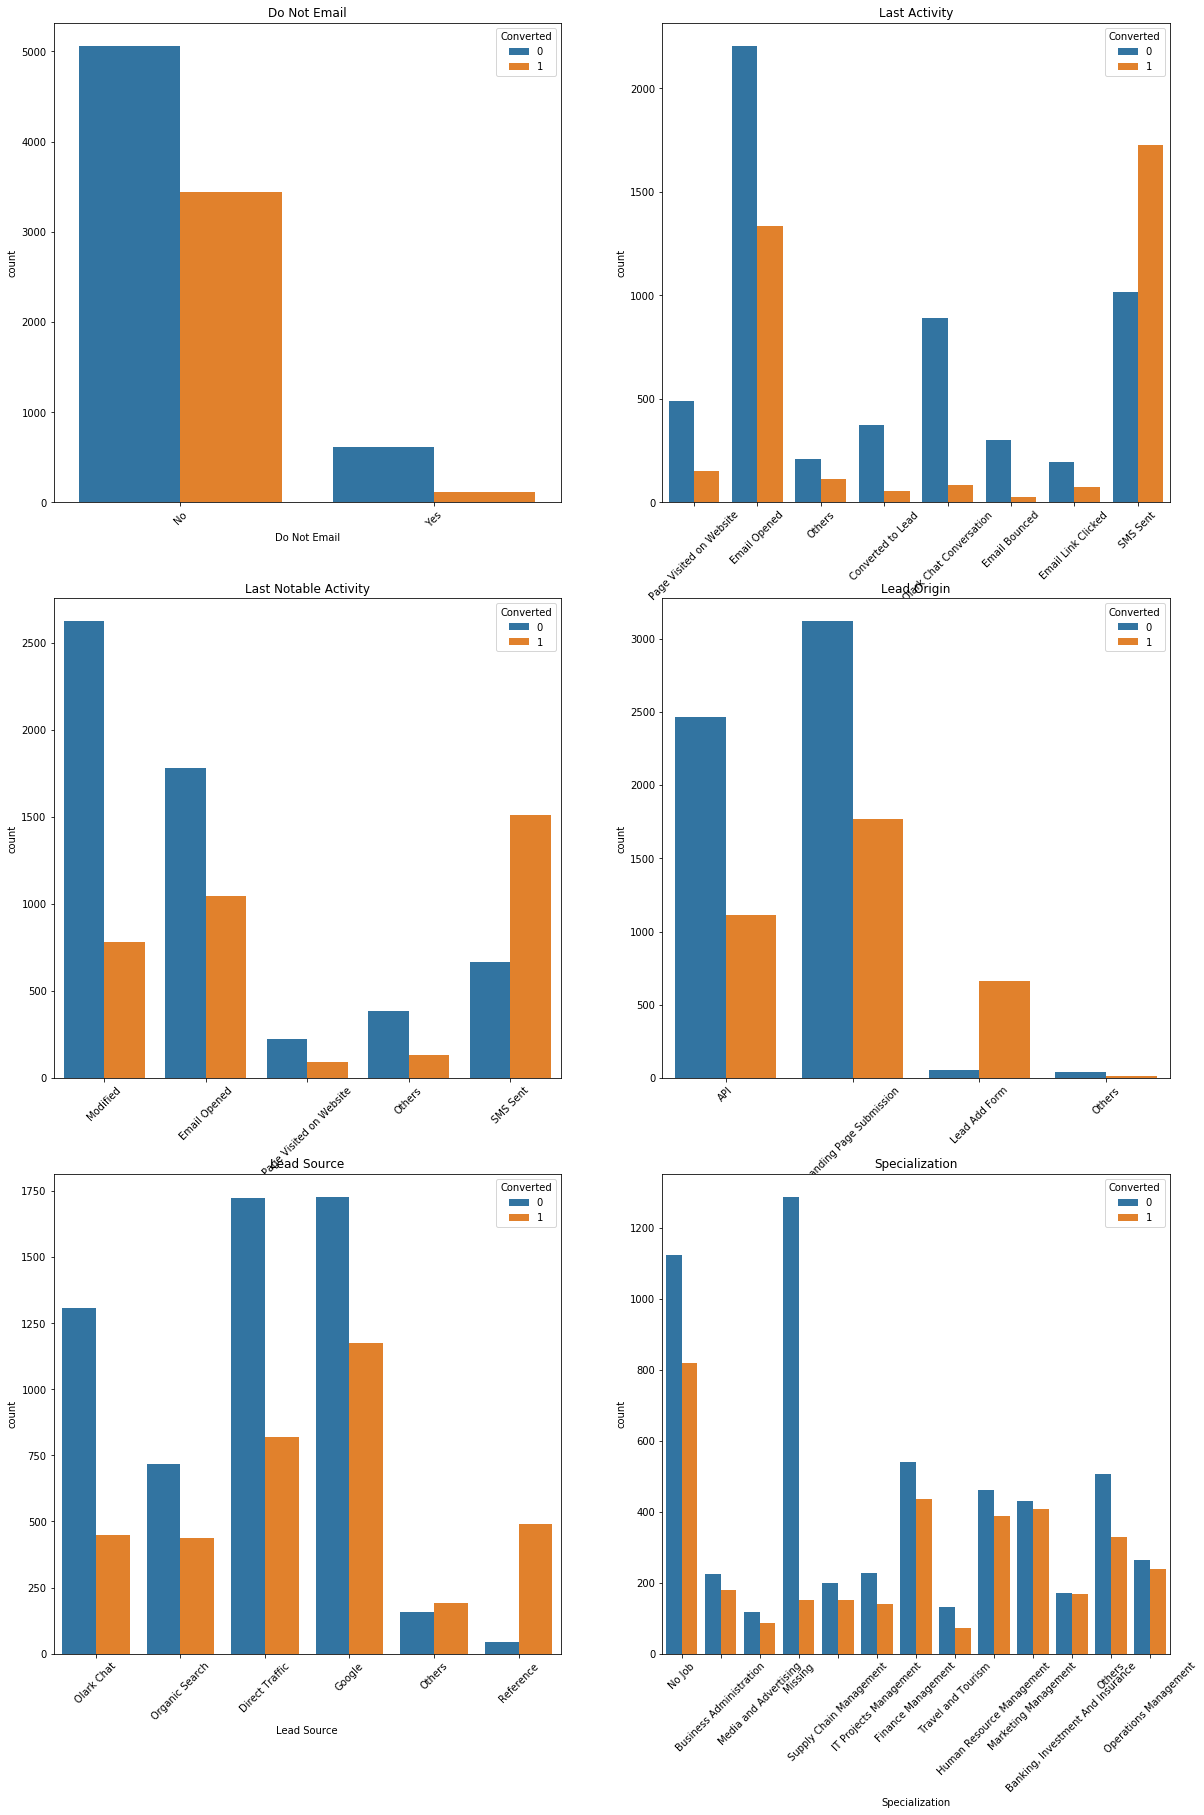

In [1438]:
# Checking conversion count relation with categorical variables
plt.figure(figsize=(20,30))
for i,col in enumerate(final_leads.select_dtypes(exclude=np.number).columns.difference(['Converted'])):
    plt.subplot(3,2,i+1)
    sns.countplot(x=col,hue='Converted',data=final_leads)
    plt.xticks(rotation=45)
    plt.title(col)

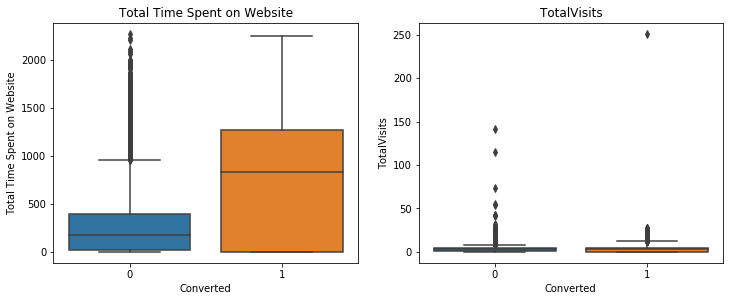

In [1439]:
# Checking conversion count relation with numerical variables
plt.figure(figsize=(12,15))
for i,col in enumerate(final_leads.select_dtypes(include=np.number).columns.difference(['Converted'])):
    plt.subplot(3,2,i+1)
    sns.boxplot(x='Converted',y=col,data=final_leads)
    plt.title(col)

#### Total time spent on website is higher for people who have been converted.

### Outlier Treatment

In [1440]:
# Check range of percentiles
final_leads.describe(percentiles = [0.05,0.15,0.25,0.35,0.50,0.75,0.90,0.95,0.99])

,TotalVisits,Total Time Spent on Website
count,9240.000000,9240.000000
mean,3.438636,487.698268
std,4.819024,548.021466
min,0.000000,0.000000
5%,0.000000,0.000000
15%,0.000000,0.000000
25%,1.000000,12.000000
35%,2.000000,98.000000
50%,3.000000,248.000000
75%,5.000000,936.000000


In [1441]:
# There is abrupt increase in TotalVisits post 99 percentile hence removing all data beyond 99 percntile.
final_leads = final_leads[final_leads['TotalVisits'] <= final_leads['TotalVisits'].quantile(0.99)]
final_leads.head()

,TotalVisits,Do Not Email,Total Time Spent on Website,Specialization,Lead Origin,Last Notable Activity,Lead Source,Last Activity,Converted
Lead Number,,,,,,,,,
660737,0.0,No,0,No Job,API,Modified,Olark Chat,Page Visited on Website,0
660728,5.0,No,674,No Job,API,Email Opened,Organic Search,Email Opened,0
660727,2.0,No,1532,Business Administration,Landing Page Submission,Email Opened,Direct Traffic,Email Opened,1
660719,1.0,No,305,Media and Advertising,Landing Page Submission,Modified,Direct Traffic,Others,0
660681,2.0,No,1428,No Job,Landing Page Submission,Modified,Google,Converted to Lead,1


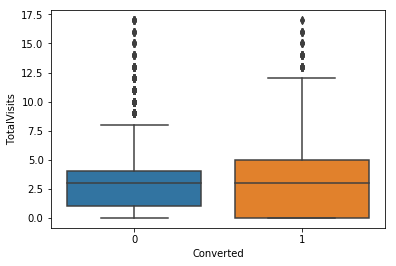

In [1442]:
# Check for outliers post treatment. Data looks much better
sns.boxplot(x='Converted',y='TotalVisits',data=final_leads)

In [1443]:
# Final Data shape for modelling
final_leads.shape

(9157, 9)

In [1444]:
# Pecentage of rows retained 
round(100*len(final_leads)/len(leads),2)

99.1

### Encoding of categorical variables

In [1445]:
# Encoding of categorical variables
encoded_cat_vars = pd.get_dummies(final_leads[final_cat_cols],drop_first=True)
encoded_cat_vars.shape

(9157, 32)

In [1446]:
# Concat to final cleaned dataset
final_leads = pd.concat([final_leads,encoded_cat_vars],axis=1)
final_leads.shape

(9157, 41)

In [1447]:
# Drop the original variables
final_leads = final_leads.drop(final_cat_cols,axis=1)
final_leads.head()

,TotalVisits,Total Time Spent on Website,Converted,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_No Job,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660728,5.0,674,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
660727,2.0,1532,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
660719,1.0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660681,2.0,1428,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1448]:
final_leads.shape

(9157, 35)

### Train-Test Split

In [1449]:
X = final_leads.drop('Converted',axis=1)
X.shape

(9157, 34)

In [1450]:
y = final_leads['Converted'].astype('float')
y.shape

(9157,)

In [1451]:
#Splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [1452]:
X_train.shape

(6409, 34)

In [1453]:
X_test.shape

(2748, 34)

### Feature Scaling

In [1454]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_No Job,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600103,0.058824,0.014376,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
621353,0.176471,0.076370,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
600441,0.705882,0.185984,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
581727,0.352941,0.072327,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
600317,0.647059,0.030099,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


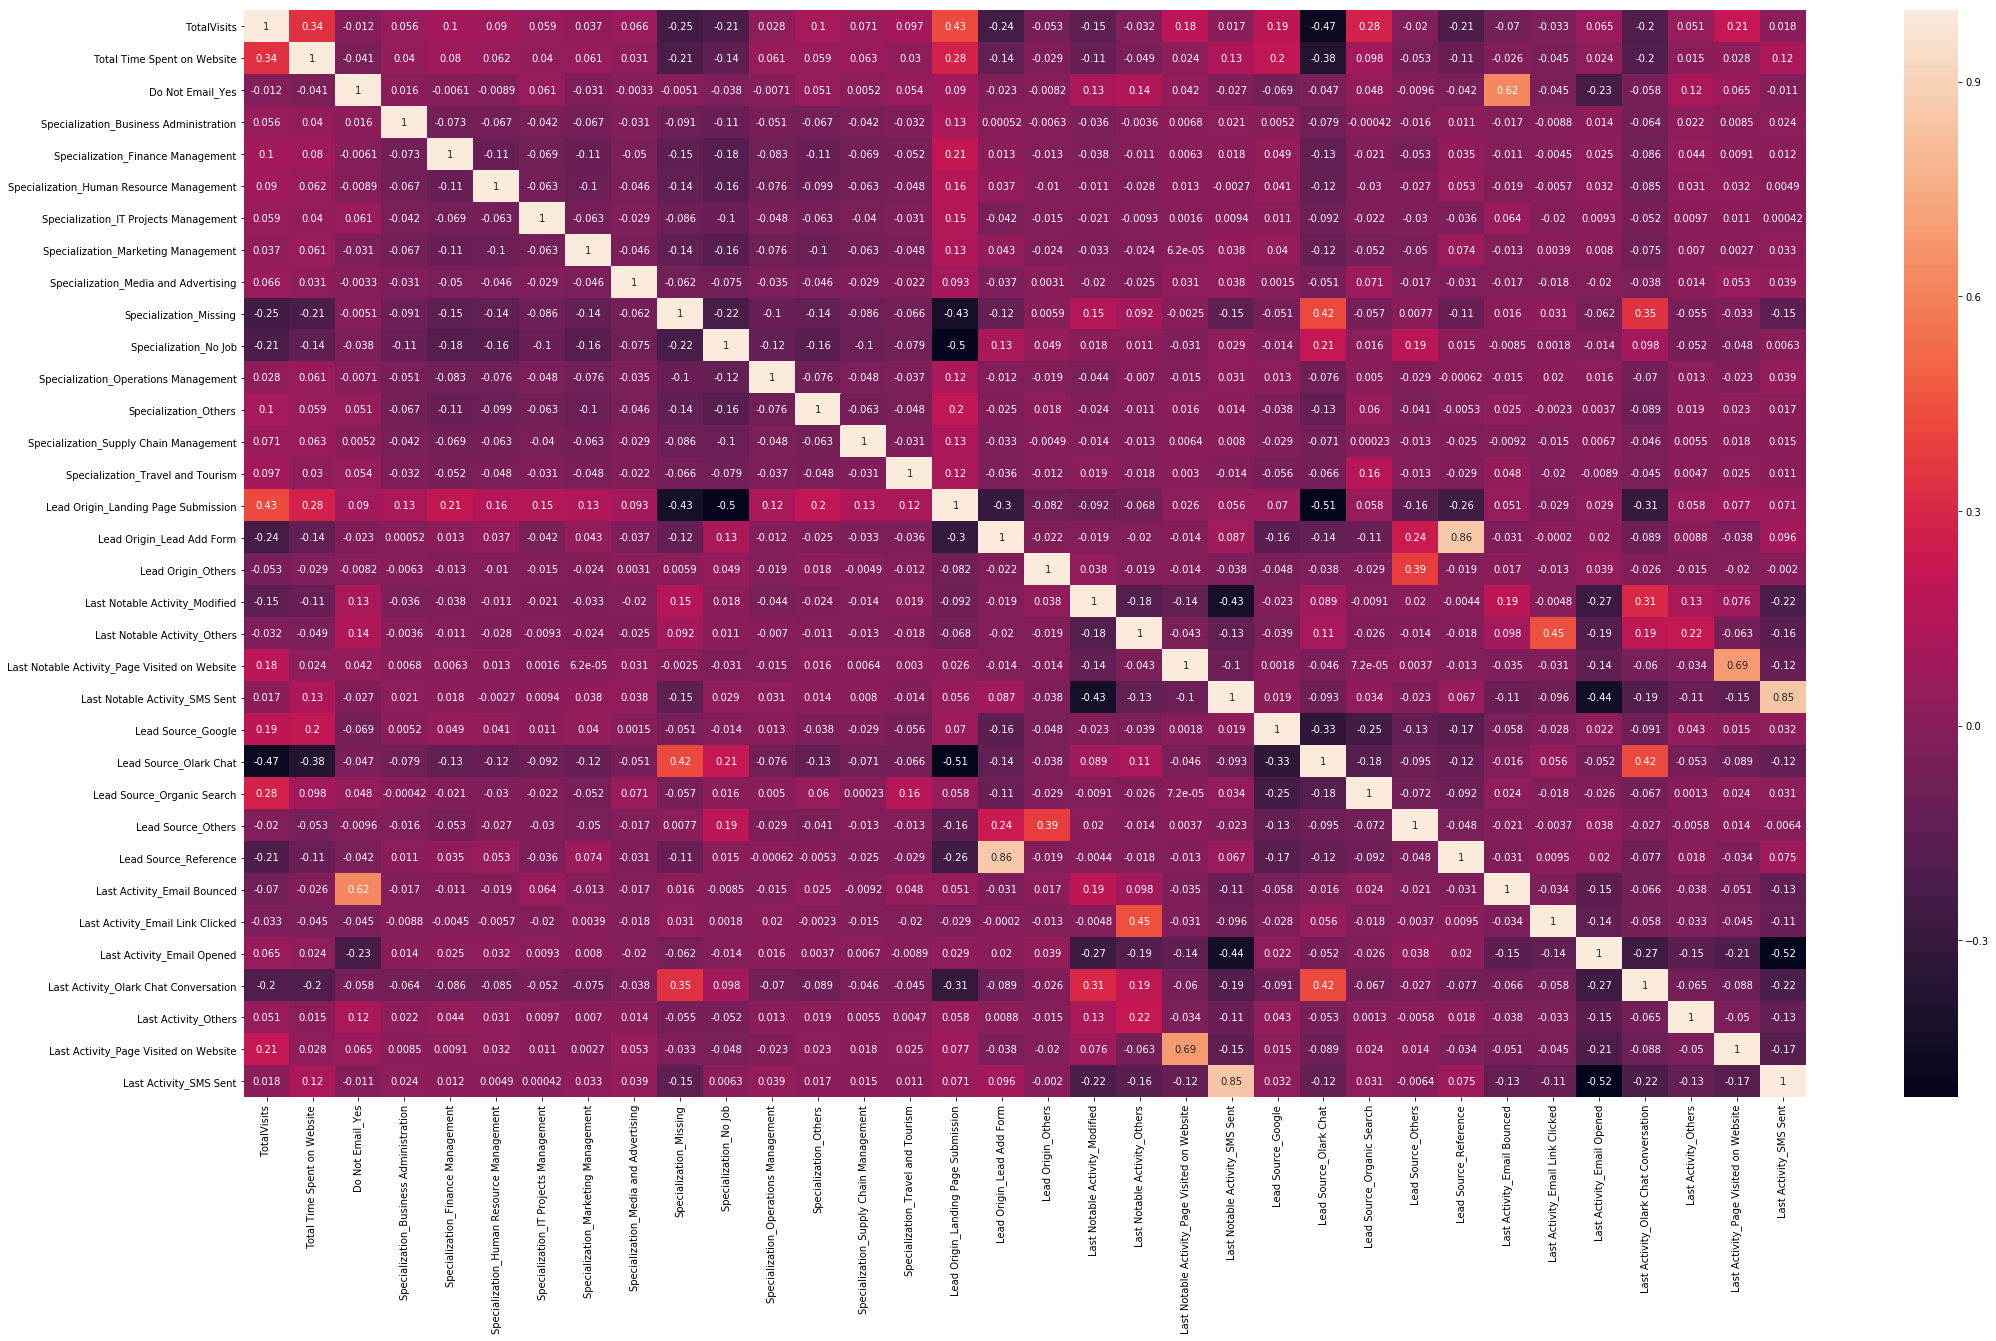

In [1455]:
# Check correlation between variables
plt.figure(figsize=(35,20))
sns.heatmap(X_train.corr(),annot=True)

# Modeling Building

In [1456]:
# Building a base model with all features
log_reg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6374
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.3
Date:                Mon, 02 Mar 2020   Deviance:                       5374.6
Time:                        19:51:09   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8775      0.335     -5.605      0.000      -2.534      -1.221
TotalVisits                                       0.4341      0.256      1.698      0.089      -0.067       0.935
Total Time Spent on Website                       4.5811      0.164     27.915      0.000       4.259       4.903
Do Not Email_Yes                                 -1.2224      0.187     -6.536      0.000      -1.589      -0.856
Specialization_Business Administration           -0.2716      0.232     -1.172      0.241      -0.726       0.183
Specialization_Finance Management                -0.1603      0.199     -0.805      0.421      -0.550       0.230
Specialization_Human Resource Management         -0.4170      0.202     -2.063      0.039      -0.813      -0.021
Specialization_IT Projects Management            -0.1804      0.241     -0.749      0.454      -0.653       0.292
Specialization_Marketing Management              -0.1943      0.203     -0.959      0.338      -0.592       0.203
Specialization_Media and Advertising             -0.3199      0.277     -1.156      0.248      -0.862       0.223
Specialization_Missing                           -2.5899      0.232    -11.152      0.000      -3.045      -2.135
Specialization_No Job                            -1.2371      0.210     -5.891      0.000      -1.649      -0.825
Specialization_Operations Management             -0.1893      0.221     -0.857      0.392      -0.622       0.244
Specialization_Others                            -0.2403      0.204     -1.179      0.238      -0.640       0.159
Specialization_Supply Chain Management           -0.2732      0.238     -1.148      0.251      -0.740       0.193
Specialization_Travel and Tourism                -0.1023      0.280     -0.365      0.715      -0.651       0.447
Lead Origin_Landing Page Submission              -1.1467      0.134     -8.558      0.000      -1.409      -0.884
Lead Origin_Lead Add Form                         4.3801      0.486      9.011      0.000       3.427       5.333
Lead Origin_Others                                0.3258      0.486      0.670      0.503      -0.627       1.279
Last Notable Activity_Modified                   -0.3789      0.136     -2.792      0.005      -0.645      -0.113
Last Notable Activity_Others                      0.7070      0.250      2.833      0.005       0.218       1.196
Last Notable Activity_Page Visited on Website     0.1829      0.318      0.576      0.565      -0.440       0.806
Last Notable Activity_SMS Sent                    0.9372      0.198      4.728      0.000       0.549       1.326
Lead Source_Google                                0.3414      0.093      3.684      0.000       0.160       0.523
Lead Source_Olark Chat                            1.6460      0.156     10.547      

## Feature Selection using RFE

In [1457]:
# Instantiate Logistic Regression
logreg = LogisticRegression()

In [1458]:
# Fit RFE
rfe = RFE(logreg,15).fit(X_train,y_train)

In [1459]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_Finance Management', False, 19),
 ('Specialization_Human Resource Management', False, 6),
 ('Specialization_IT Projects Management', False, 18),
 ('Specialization_Marketing Management', False, 16),
 ('Specialization_Media and Advertising', False, 9),
 ('Specialization_Missing', True, 1),
 ('Specialization_No Job', True, 1),
 ('Specialization_Operations Management', False, 17),
 ('Specialization_Others', False, 15),
 ('Specialization_Supply Chain Management', False, 13),
 ('Specialization_Travel and Tourism', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', False, 11),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Others', True, 1),
 ('Last Notable Activity_Page Visited on Website', False, 8),
 ('Last Notable Ac

In [1460]:
selected_cols = X_train.columns[rfe.support_].tolist()
selected_cols

['TotalVisits',
 'Total Time Spent on Website',
 'Do Not Email_Yes',
 'Specialization_Missing',
 'Specialization_No Job',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Others',
 'Last Notable Activity_SMS Sent',
 'Lead Source_Olark Chat',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Last Activity_SMS Sent']

In [1461]:
X_train.columns[~rfe.support_]

Index(['Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Origin_Others',
       'Last Notable Activity_Page Visited on Website', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Page Visited on Website'],
      dtype='object')

### Fitting the selected columns using statsmodel GLM

In [1462]:
# Model 2
X_train_sm = sm.add_constant(X_train[selected_cols])
log_reg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.4
Date:                Mon, 02 Mar 2020   Deviance:                       5408.8
Time:                        19:51:10   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5844      0.196     -8.069      0.000      -1.969      -1.200
TotalVisits                               0.6274      0.238      2.638      0.008       0.161       1.093
Total Time Spent on Website               4.5670      0.163     28.050      0.000       4.248       4.886
Do Not Email_Yes                         -1.2425      0.165     -7.521      0.000      -1.566      -0.919
Specialization_Missing                   -2.3042      0.161    -14.333      0.000      -2.619      -1.989
Specialization_No Job                    -0.9396      0.126     -7.479      0.000      -1.186      -0.693
Lead Origin_Landing Page Submission      -1.2466      0.125     -9.953      0.000      -1.492      -1.001
Lead Origin_Lead Add Form                 3.5451      0.209     17.000      0.000       3.136       3.954
Last Notable Activity_Modified           -0.4781      0.119     -4.013      0.000      -0.712      -0.245
Last Notable Activity_Others              0.4909      0.202      2.432      0.015       0.095       0.887
Last Notable Activity_SMS Sent            0.8066      0.187      4.311      0.000       0.440       1.173
Lead Source_Olark Chat                    1.3770      0.132     10.430      0.000       1.118       1.636
Last Activity_Email Opened                0.5903      0.134      4.400      0.000       0.327       0.853
Last Activity_Olark Chat Conversation    -0.7150      0.192     -3.718      0.000      -1.092      -0.338
Last Activity_Others                      0.6189      0.208      2.972      0.003       0.211       1.027
Last Activity_SMS Sent                    1.1517      0.168      6.849      0.000       0.822       1.481
=========================================================================================================
"""

In [1463]:
# Calculate vifs of all features
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_SMS Sent,6.89
14,Last Activity_SMS Sent,6.63
5,Lead Origin_Landing Page Submission,4.63
11,Last Activity_Email Opened,3.36
7,Last Notable Activity_Modified,3.18
0,TotalVisits,2.98
10,Lead Source_Olark Chat,2.34
1,Total Time Spent on Website,2.22
3,Specialization_Missing,2.14
4,Specialization_No Job,2.11


In [1464]:
# removing Last Activity_SMS Sent as high Vif
selected_cols.remove('Last Notable Activity_SMS Sent')
selected_cols

['TotalVisits',
 'Total Time Spent on Website',
 'Do Not Email_Yes',
 'Specialization_Missing',
 'Specialization_No Job',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Others',
 'Lead Source_Olark Chat',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Last Activity_SMS Sent']

In [1465]:
# Model 3
X_train_sm = sm.add_constant(X_train[selected_cols])
log_reg3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.8
Date:                Mon, 02 Mar 2020   Deviance:                       5427.5
Time:                        19:51:10   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3330      0.188     -7.109      0.000      -1.701      -0.966
TotalVisits                               0.5467      0.237      2.307      0.021       0.082       1.011
Total Time Spent on Website               4.5841      0.163     28.187      0.000       4.265       4.903
Do Not Email_Yes                         -1.2425      0.165     -7.528      0.000      -1.566      -0.919
Specialization_Missing                   -2.3123      0.160    -14.409      0.000      -2.627      -1.998
Specialization_No Job                    -0.9230      0.126     -7.353      0.000      -1.169      -0.677
Lead Origin_Landing Page Submission      -1.2410      0.125     -9.916      0.000      -1.486      -0.996
Lead Origin_Lead Add Form                 3.5566      0.208     17.072      0.000       3.148       3.965
Last Notable Activity_Modified           -0.8124      0.092     -8.790      0.000      -0.994      -0.631
Last Notable Activity_Others              0.2097      0.192      1.095      0.274      -0.166       0.585
Lead Source_Olark Chat                    1.3732      0.132     10.415      0.000       1.115       1.632
Last Activity_Email Opened                0.4001      0.127      3.144      0.002       0.151       0.650
Last Activity_Olark Chat Conversation    -0.6451      0.192     -3.353      0.001      -1.022      -0.268
Last Activity_Others                      0.6930      0.208      3.325      0.001       0.285       1.101
Last Activity_SMS Sent                    1.6171      0.128     12.655      0.000       1.367       1.868
=========================================================================================================
"""

In [1466]:
# Calculate vifs of all features
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.36
10,Last Activity_Email Opened,3.22
0,TotalVisits,2.98
13,Last Activity_SMS Sent,2.72
9,Lead Source_Olark Chat,2.30
7,Last Notable Activity_Modified,2.22
1,Total Time Spent on Website,2.17
3,Specialization_Missing,2.09
4,Specialization_No Job,2.01
11,Last Activity_Olark Chat Conversation,1.93


In [1467]:
# removing Lead Origin_Lead Add Form as high p-value
selected_cols.remove('Last Notable Activity_Others')
selected_cols

['TotalVisits',
 'Total Time Spent on Website',
 'Do Not Email_Yes',
 'Specialization_Missing',
 'Specialization_No Job',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Modified',
 'Lead Source_Olark Chat',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Last Activity_SMS Sent']

#### Final Model 

In [1468]:
# Model 4
X_train_sm = sm.add_constant(X_train[selected_cols])
log_reg4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
log_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.3
Date:                Mon, 02 Mar 2020   Deviance:                       5428.7
Time:                        19:51:10   Pearson chi2:                 6.61e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2721      0.179     -7.117      0.000      -1.622      -0.922
TotalVisits                               0.5381      0.237      2.273      0.023       0.074       1.002
Total Time Spent on Website               4.5841      0.163     28.198      0.000       4.265       4.903
Do Not Email_Yes                         -1.2218      0.164     -7.456      0.000      -1.543      -0.901
Specialization_Missing                   -2.3053      0.160    -14.382      0.000      -2.619      -1.991
Specialization_No Job                    -0.9214      0.125     -7.344      0.000      -1.167      -0.675
Lead Origin_Landing Page Submission      -1.2388      0.125     -9.905      0.000      -1.484      -0.994
Lead Origin_Lead Add Form                 3.5671      0.208     17.127      0.000       3.159       3.975
Last Notable Activity_Modified           -0.8528      0.085    -10.045      0.000      -1.019      -0.686
Lead Source_Olark Chat                    1.3752      0.132     10.429      0.000       1.117       1.634
Last Activity_Email Opened                0.3443      0.116      2.958      0.003       0.116       0.572
Last Activity_Olark Chat Conversation    -0.6188      0.190     -3.250      0.001      -0.992      -0.246
Last Activity_Others                      0.7264      0.206      3.533      0.000       0.323       1.129
Last Activity_SMS Sent                    1.5618      0.117     13.339      0.000       1.332       1.791
=========================================================================================================
"""

In [1469]:
# Calculate vifs of all features
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,4.11
9,Last Activity_Email Opened,3.00
0,TotalVisits,2.96
12,Last Activity_SMS Sent,2.53
8,Lead Source_Olark Chat,2.24
1,Total Time Spent on Website,2.16
3,Specialization_Missing,2.02
4,Specialization_No Job,1.94
7,Last Notable Activity_Modified,1.89
10,Last Activity_Olark Chat Conversation,1.89


`VIF values are less than 5 and all features are significant` 

## Model Evaluation

In [1470]:
# Predict probaility of converted of training set
y_train_pred_prob = log_reg4.predict(X_train_sm)
y_train_pred_prob.head()

Lead Number
600103    0.049798
621353    0.196487
600441    0.570351
581727    0.161767
600317    0.386283
dtype: float64

In [1471]:
# Convert probability to predicted variable considering the random threshold of 0.5
y_train_pred = y_train_pred_prob.apply(lambda x:1 if x>=0.5 else 0)
y_train_pred.head()

Lead Number
600103    0
621353    0
600441    1
581727    0
600317    0
dtype: int64

In [1472]:
# overall accuracy of training set.
print(accuracy_score(y_train,y_train_pred))

0.8091745982212514


In [1473]:
# Checking the confusion matrix
confusion = confusion_matrix(y_train,y_train_pred)
confusion

array([[3463,  466],
       [ 757, 1723]], dtype=int64)

In [1474]:
# Prediction details
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1475]:
# Checking the precision score on training set
precision_score(y_train,y_train_pred)

0.7871174052078574

In [1476]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.694758064516129

In [1477]:
# Let us calculate specificity
TN / float(TN+FP)

0.881394756935607

## ROC Curve

In [1478]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1479]:
y_train_pred_prob.dtype

dtype('float64')

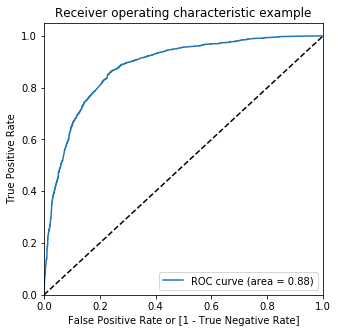

In [1480]:
draw_roc(y_train,y_train_pred_prob)

## Finding Optimal Cutoff Point

In [1481]:
# Create Dataframe
y_train_pred_final = pd.DataFrame({'Actual':y_train,'Predicted':y_train_pred,'Probability':y_train_pred_prob})
y_train_pred_final.head()

,Actual,Predicted,Probability
Lead Number,,,
600103,0.0,0,0.049798
621353,1.0,0,0.196487
600441,1.0,1,0.570351
581727,1.0,0,0.161767
600317,0.0,0,0.386283


In [1482]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual,Predicted,Probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,
600103,0.0,0,0.049798,1,0,0,0,0,0,0,0,0,0
621353,1.0,0,0.196487,1,1,0,0,0,0,0,0,0,0
600441,1.0,1,0.570351,1,1,1,1,1,1,0,0,0,0
581727,1.0,0,0.161767,1,1,0,0,0,0,0,0,0,0
600317,0.0,0,0.386283,1,1,1,1,0,0,0,0,0,0


In [1483]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.386956     1.000000     0.000000
0.1   0.1  0.614604     0.970161     0.390176
0.2   0.2  0.745670     0.918952     0.636294
0.3   0.3  0.790295     0.874194     0.737338
0.4   0.4  0.808863     0.775806     0.829728
0.5   0.5  0.809175     0.694758     0.881395
0.6   0.6  0.798408     0.624194     0.908374
0.7   0.7  0.770479     0.501613     0.940188
0.8   0.8  0.743642     0.394758     0.963858
0.9   0.9  0.689343     0.218548     0.986511


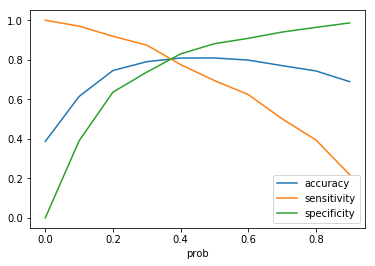

In [1484]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [1485]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Probability.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Actual,Predicted,Probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
Lead Number,,,,,,,,,,,,,,
600103,0.0,0,0.049798,1,0,0,0,0,0,0,0,0,0,0
621353,1.0,0,0.196487,1,1,0,0,0,0,0,0,0,0,0
600441,1.0,1,0.570351,1,1,1,1,1,1,0,0,0,0,1
581727,1.0,0,0.161767,1,1,0,0,0,0,0,0,0,0,0
600317,0.0,0,0.386283,1,1,1,1,0,0,0,0,0,0,0


In [1486]:
# overall accuracy of training set.
print(accuracy_score(y_train_pred_final['Actual'],y_train_pred_final['final_predicted']))

0.8088625370572632


In [1487]:
confusion2 = confusion_matrix(y_train_pred_final['Actual'],y_train_pred_final['final_predicted'])
confusion2

array([[3260,  669],
       [ 556, 1924]], dtype=int64)

In [1488]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1489]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7758064516129032

In [1490]:
# Let us calculate specificity
TN / float(TN+FP)

0.829727666072792

In [1491]:
# Checking the precision score on training set
precision_score(y_train_pred_final['Actual'],y_train_pred_final['final_predicted'])

0.7419976860779021

# CEO Expectations

- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Since CEO wants lead conversion rate to be around 80%, so from all the leads labeled as hot leads we need to ensure 80% of them are converted. In statistical terms we need the `Precision` of the model to be 80%

In [1492]:
# Checking the precision score on training set
precision_score(y_train_pred_final['Actual'],y_train_pred_final['final_predicted'])

0.7419976860779021

In [1493]:
# Checking the recall score on training set
recall_score(y_train_pred_final['Actual'],y_train_pred_final['final_predicted'])

0.7758064516129032

In [1494]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Actual'],y_train_pred_final['Probability'])

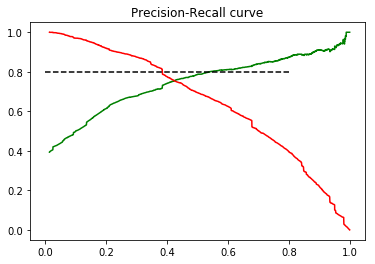

In [1495]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.plot([0, 0.8], [0.8, 0.8], 'k--')
plt.title("Precision-Recall curve")
plt.show()

In [1496]:
# Since we want the precision score to be around 80 we will take the threshold as 0.55 as per the curve and recalculate
y_train_pred_final['final_predicted'] = y_train_pred_final.Probability.map( lambda x: 1 if x > 0.55 else 0)

In [1497]:
# Checking the precision score on training set with threshold set as 0.55
precision_score(y_train_pred_final['Actual'],y_train_pred_final['final_predicted'])

0.8021547502448579

#### We got the required precision score of 80% by taking threshold of 0.55. We will use this as our `Final Model`

## Predictions on Test set

In [1498]:
# Scale the test set
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_No Job,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
592990,0.176471,0.167116,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
638468,0.294118,0.057951,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
635947,0.529412,0.582210,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
585800,0.058824,0.057053,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
631473,0.235294,0.097484,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1499]:
# Add the constant
X_test_sm = sm.add_constant(X_test[selected_cols])
X_test_sm.shape

(2748, 14)

In [1500]:
y_test_pred_prob = log_reg4.predict(X_test_sm)
y_test_pred_prob.head()

Lead Number
592990    0.212507
638468    0.027691
635947    0.686299
585800    0.044339
631473    0.057854
dtype: float64

In [1501]:
y_test_pred = y_test_pred_prob.map(lambda x:1 if x>0.55 else 0)
y_test_pred.head()

Lead Number
592990    0
638468    0
635947    1
585800    0
631473    0
dtype: int64

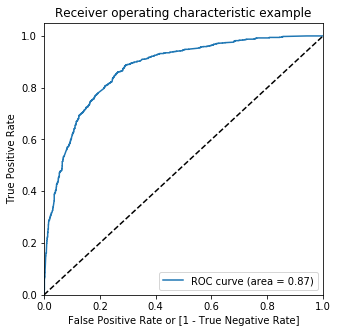

In [1516]:
# Draw ROC Curve
draw_roc(y_test,y_test_pred_prob)

In [1502]:
# Let's check the test set prediction accuracy.
accuracy_score(y_test,y_test_pred)

0.799490538573508

In [1503]:
# Let's check the test set prediction precision score.
precision_score(y_test,y_test_pred)

0.780045351473923

In [1504]:
# Test data confusion matrix
confusion_test = confusion_matrix(y_test,y_test_pred)
confusion_test

array([[1509,  194],
       [ 357,  688]], dtype=int64)

In [1505]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [1506]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6583732057416268

#### So we are getting a precision score close to 80% on the test data.

## Getting the Lead Score for all the leads in the Dataset

In [1507]:
lead_details = final_leads.copy()
lead_details.head()

,TotalVisits,Total Time Spent on Website,Converted,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_No Job,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660728,5.0,674,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
660727,2.0,1532,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
660719,1.0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660681,2.0,1428,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1508]:
lead_details = lead_details.drop('Converted',axis=1)
lead_details.shape

(9157, 34)

In [1509]:
lead_details[['TotalVisits','Total Time Spent on Website']] = scaler.transform(lead_details[['TotalVisits','Total Time Spent on Website']])
lead_details.head()

,TotalVisits,Total Time Spent on Website,Do Not Email_Yes,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_No Job,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660728,0.294118,0.302785,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
660727,0.117647,0.688230,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
660719,0.058824,0.137017,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660681,0.117647,0.641509,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1510]:
lead_details = lead_details[selected_cols] 
lead_details.shape

(9157, 13)

In [1511]:
lead_details = sm.add_constant(lead_details)
lead_details.shape

(9157, 14)

In [1512]:
lead_details['Predicted_prob'] = log_reg4.predict(lead_details)
lead_details.head()

,const,TotalVisits,Total Time Spent on Website,Do Not Email_Yes,Specialization_Missing,Specialization_No Job,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Notable Activity_Modified,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Predicted_prob
Lead Number,,,,,,,,,,,,,,,
660737,1.0,0.000000,0.000000,0,0,1,0,0,1,1,0,0,0,0,0.158286
660728,1.0,0.294118,0.302785,0,0,1,0,0,0,0,1,0,0,0,0.424854
660727,1.0,0.117647,0.688230,0,0,0,1,0,0,0,1,0,0,0,0.741082
660719,1.0,0.058824,0.137017,0,0,0,1,0,1,0,0,0,1,0,0.121576
660681,1.0,0.117647,0.641509,0,0,1,1,0,1,0,0,0,0,0,0.217372


In [1513]:
lead_details = lead_details.reset_index()
lead_details.head()

,Lead Number,const,TotalVisits,Total Time Spent on Website,Do Not Email_Yes,Specialization_Missing,Specialization_No Job,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Notable Activity_Modified,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Predicted_prob
0,660737,1.0,0.000000,0.000000,0,0,1,0,0,1,1,0,0,0,0,0.158286
1,660728,1.0,0.294118,0.302785,0,0,1,0,0,0,0,1,0,0,0,0.424854
2,660727,1.0,0.117647,0.688230,0,0,0,1,0,0,0,1,0,0,0,0.741082
3,660719,1.0,0.058824,0.137017,0,0,0,1,0,1,0,0,0,1,0,0.121576
4,660681,1.0,0.117647,0.641509,0,0,1,1,0,1,0,0,0,0,0,0.217372


In [1514]:
Lead_scoring_result = pd.DataFrame()
Lead_scoring_result['Lead Number'] = lead_details["Lead Number"]
Lead_scoring_result['Lead Score'] = round(100*lead_details["Predicted_prob"]).astype('int')
Lead_scoring_result

,Lead Number,Lead Score
0,660737,16
1,660728,42
2,660727,74
3,660719,12
4,660681,22
5,660680,2
6,660673,60
7,660664,2
8,660624,12
9,660616,34
